In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [116]:
data = pd.read_csv("neo.csv")

# Data analysis

In [117]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [118]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [120]:
data.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [121]:
for i in ["orbiting_body","sentry_object","hazardous"]:
    print(i)
    print(data[i].value_counts())

orbiting_body
Earth    90836
Name: orbiting_body, dtype: int64
sentry_object
False    90836
Name: sentry_object, dtype: int64
hazardous
False    81996
True      8840
Name: hazardous, dtype: int64


In [122]:
data.drop(columns=["id","name","orbiting_body","sentry_object"], inplace=True)

In [123]:
data.select_dtypes(include="number").columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

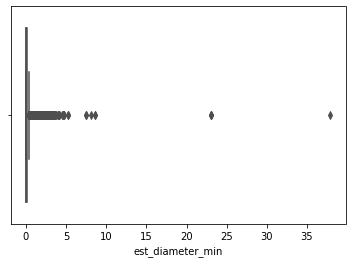

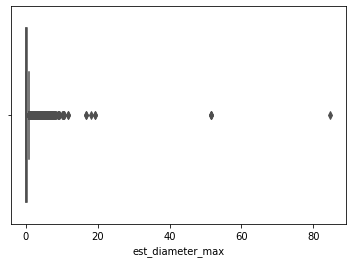

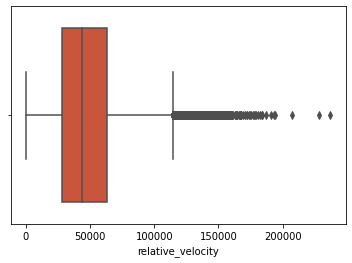

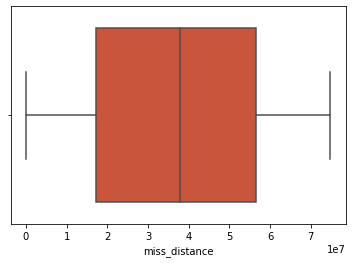

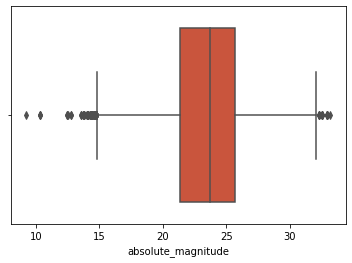

In [124]:
for i in ['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude']:
       plt.subplots()
       sns.boxplot(x=i, data=data, color="#E14625")
       plt.show()

In [127]:
data = data[~((data["est_diameter_min"] > 20)  | (data["est_diameter_max"] > 40)  | (data["relative_velocity"] > 200000))]
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [128]:
data.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90829.000000,90829.000000,90829.000000,9.082900e+04,90829.000000
mean,0.126249,0.282302,48062.003327,3.706596e+07,23.527825
std,0.236772,0.529439,25273.387220,2.235224e+07,2.892701
min,0.000609,0.001362,203.346433,6.745533e+03,12.440000
25%,0.019256,0.043057,28620.245496,1.721065e+07,21.340000
50%,0.048368,0.108153,44190.108201,3.784584e+07,23.700000
75%,0.143402,0.320656,62921.957723,5.654838e+07,25.700000
max,8.640820,19.321462,194056.414989,7.479865e+07,33.200000


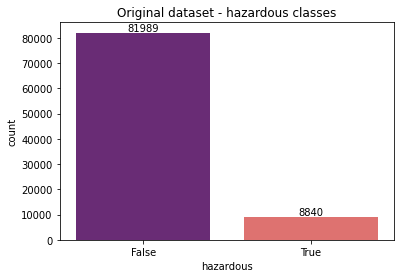

In [77]:
haz = sns.countplot(x="hazardous", data=data, palette="magma")
haz.bar_label(haz.containers[0])
plt.title("Original dataset - hazardous classes")
plt.show()

In [78]:
X = data.drop(columns="hazardous")
Y = data["hazardous"]

In [79]:
# Splitting the data into Training & Testing
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y)

In [80]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape) 
print(yTest.shape)

(68121, 5)
(22708, 5)
(68121,)
(22708,)


In [81]:
# Importing metrics
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [82]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue", "RecalTrue"])

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
# Defining a function for metrics.
# Logistic Regression
# GaussianNB
# DecisionTreeClassifier
# RandomForestClassifier
# KNN
# SVC
# XGB
def classificationmodel(test):
    test.fit(xTrain, yTrain)
    scoretrain = test.score(xTrain, yTrain)
    scoretest = test.score(xTest, yTest)
    print("Score of the training dataset:", test.score(xTrain, yTrain))
    print("Score of the testing dataset:", test.score(xTest, yTest), "\n")
    print("Classification report on Testing split:")
    print(classification_report(yTest, test.predict(xTest)))
    plot_confusion_matrix(test, xTest, yTest)
    if len(results.index) == 0:
        results.loc[len(results.index)] = ["LR", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 1:
        results.loc[len(results.index)] = ["GNB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 2:
        results.loc[len(results.index)] = ["DTC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 3:
        results.loc[len(results.index)] = ["RFC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 4:
        results.loc[len(results.index)] = ["KNN", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 5:
        results.loc[len(results.index)] = ["GBC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 6:
        results.loc[len(results.index)] = ["XGB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]

def crossval(m):
    print("Cross-validation on Training split (mean):")
    for i in ["accuracy","precision","recall"]:
        print(i.upper())
        print(cross_val_score(m, xTrain, yTrain, scoring=i).mean())
    print("\n")

# Trying the first two models

Cross-validation on Training split (mean):
ACCURACY
0.902541066762917
PRECISION
0.0
RECALL
0.0


Score of the training dataset: 0.9025410666314352
Score of the testing dataset: 0.9030738065879866 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     20507
        True       0.00      0.00      0.00      2201

    accuracy                           0.90     22708
   macro avg       0.45      0.50      0.47     22708
weighted avg       0.82      0.90      0.86     22708



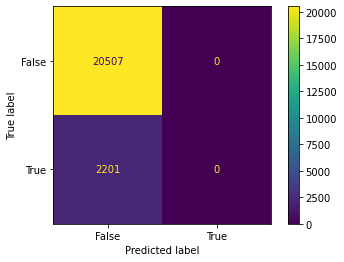

In [85]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
crossval(LR)
classificationmodel(LR)

Cross-validation on Training split (mean):
ACCURACY
0.8968306173132141
PRECISION
0.28020011605894873
RECALL
0.03569844562878492


Score of the training dataset: 0.8968453193582009
Score of the testing dataset: 0.897789325347895 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.91      0.99      0.95     20507
        True       0.28      0.03      0.06      2201

    accuracy                           0.90     22708
   macro avg       0.59      0.51      0.50     22708
weighted avg       0.84      0.90      0.86     22708



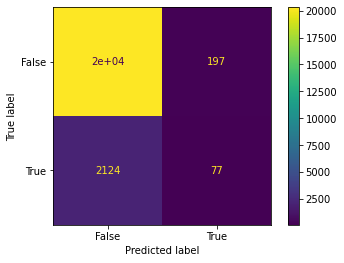

In [86]:
from sklearn.naive_bayes import GaussianNB
GSS = GaussianNB()
crossval(GSS)
classificationmodel(GSS)

# Feature engineering

In [87]:
def transformization(tran):
    global xTrain, yTrain
    if tran == "stand":
        print("You have selected Standardization.")
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        scaled = scaler.fit_transform(X)
        xTrain, xTest, yTrain, yTest = train_test_split(scaled,Y)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)

    elif tran == "norm":
        print("You have selected Normalization.")
        from sklearn.preprocessing import MinMaxScaler
        norm = MinMaxScaler()
        normed = norm.fit_transform(X)
        xTrain, xTest, yTrain, yTest = train_test_split(normed,Y)
        xTrain = pd.DataFrame(xTrain, columns=X.columns)
        xTest = pd.DataFrame(xTest, columns=X.columns)
        
    else:
        print("You didn't select any type of transformation of features, proceeding with the original dataset.")


def classdist(classd):
    global xTrain, yTrain
    if classd == "over":
        print("You have selected Oversampling.")
        from imblearn.over_sampling import RandomOverSampler
        ros = RandomOverSampler(sampling_strategy="minority")
        xTrain, yTrain = ros.fit_resample(xTrain, yTrain)
    elif classd == "smote":
        print("You have selected SMOTE.")
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state = 42)
        xTrain, yTrain = smote.fit_resample(xTrain, yTrain)
    elif classd == "under":
        print("You have selected Undersampling.")
        from imblearn.under_sampling import RandomUnderSampler
        ros = RandomUnderSampler(sampling_strategy="majority")
        xTrain, yTrain = ros.fit_resample(xTrain, yTrain)
    else:
        print("You didn't select any class sampling technique, proceeding with the original dataset.")



In [88]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue","RecalTrue"])

In [89]:
# TRANSFORMATION OF FEATURES
# Standardization - "stand"
# Normalizazion - "norm"
# None - "none"
transformization("none")

You didn't select any type of transformation of features, proceeding with the original dataset.


In [90]:
# CLASS SAMPLING
# Oversampling - "over"
# SMOTE - "smote"
# Undersampling - "under"
# None - "none"
classdist("over")

You have selected Oversampling.


In [91]:
xTrain.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.026580,0.059435,43301.680692,5.362684e+07,25.00
1,0.006677,0.014929,29287.865145,6.886952e+07,28.00
2,0.250354,0.559809,95188.138203,5.634196e+07,20.13
3,0.021211,0.047429,14772.592696,5.236924e+07,25.49
4,0.022623,0.050587,20288.632845,3.925150e+07,25.35


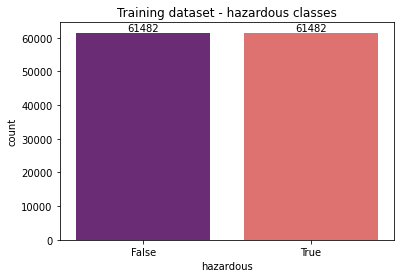

In [92]:
haz = sns.countplot(x=yTrain, palette="magma")
haz.bar_label(haz.containers[0])
plt.title("Training dataset - hazardous classes")
plt.show()

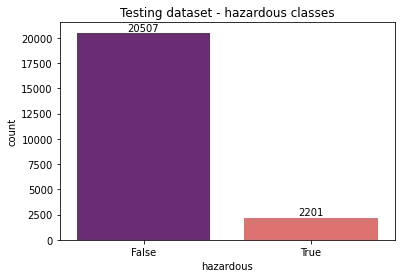

In [93]:
haz1 = sns.countplot(x=yTest, palette="magma")
haz1.bar_label(haz1.containers[0])
plt.title("Testing dataset - hazardous classes")
plt.show()

# ML models

Cross-validation on Training split (mean):
ACCURACY
0.5907500037500555
PRECISION
0.5803796144050472
RECALL
0.7288979811580536


Score of the training dataset: 0.5706060310334732
Score of the testing dataset: 0.4060243086137044 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.93      0.37      0.53     20507
        True       0.11      0.76      0.20      2201

    accuracy                           0.41     22708
   macro avg       0.52      0.56      0.36     22708
weighted avg       0.86      0.41      0.50     22708



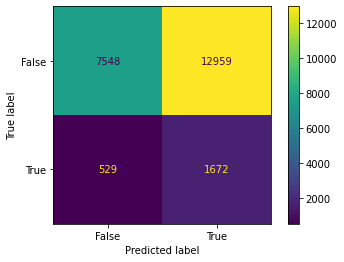

In [94]:
# Linear Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import cross_val_score
crossval(LR)
classificationmodel(LR)

Cross-validation on Training split (mean):
ACCURACY
0.6094466975715329
PRECISION
0.6332901543153648
RECALL
0.5200060300027157


Score of the training dataset: 0.6092677531635275
Score of the testing dataset: 0.685485291527215 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.93      0.70      0.80     20507
        True       0.16      0.52      0.24      2201

    accuracy                           0.69     22708
   macro avg       0.55      0.61      0.52     22708
weighted avg       0.86      0.69      0.75     22708



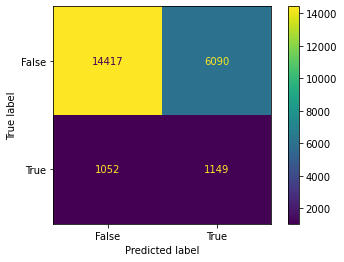

In [95]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GSS = GaussianNB()
crossval(GSS)
classificationmodel(GSS)

Cross-validation on Training split (mean):
ACCURACY
0.9669415511329916
PRECISION
0.9386638012641983
RECALL
0.9999186727391022


Score of the training dataset: 1.0
Score of the testing dataset: 0.8932534789501497 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     20507
        True       0.45      0.44      0.44      2201

    accuracy                           0.89     22708
   macro avg       0.69      0.69      0.69     22708
weighted avg       0.89      0.89      0.89     22708



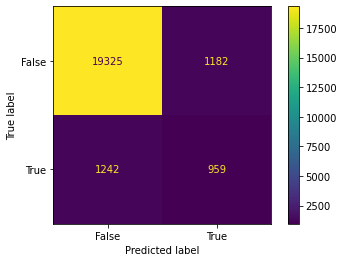

In [96]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
crossval(DTR)
classificationmodel(DTR)

Score of the training dataset: 1.0
Score of the testing dataset: 0.9067729434560508 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     20507
        True       0.52      0.54      0.53      2201

    accuracy                           0.91     22708
   macro avg       0.73      0.74      0.74     22708
weighted avg       0.91      0.91      0.91     22708



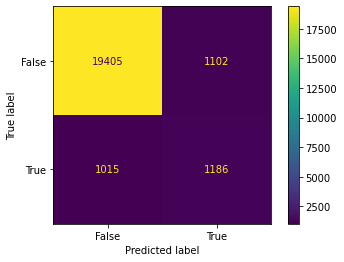

In [97]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
# crossval(RFC)
classificationmodel(RFC)

Score of the training dataset: 0.9161136592823916
Score of the testing dataset: 0.7291703364453056 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.92      0.77      0.84     20507
        True       0.15      0.37      0.21      2201

    accuracy                           0.73     22708
   macro avg       0.53      0.57      0.52     22708
weighted avg       0.84      0.73      0.78     22708



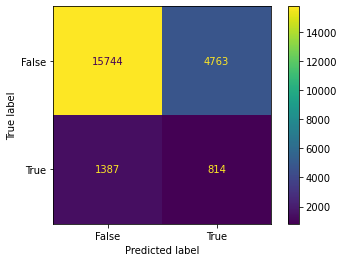

In [98]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
KNNC = KNeighborsClassifier()
# crossval(KNNC)
classificationmodel(KNNC)

Score of the training dataset: 0.8791516216128298
Score of the testing dataset: 0.7853179496212789 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       1.00      0.76      0.87     20507
        True       0.31      0.99      0.47      2201

    accuracy                           0.79     22708
   macro avg       0.65      0.88      0.67     22708
weighted avg       0.93      0.79      0.83     22708



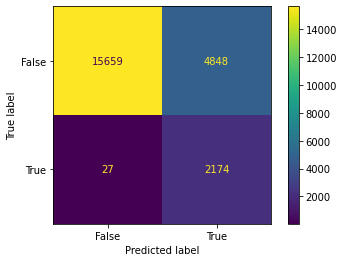

In [99]:
# Gradien Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
#crossval(GBC)
classificationmodel(GBC)

Score of the training dataset: 0.9088839009791484
Score of the testing dataset: 0.8184340320591862 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.99      0.81      0.89     20507
        True       0.34      0.93      0.50      2201

    accuracy                           0.82     22708
   macro avg       0.67      0.87      0.69     22708
weighted avg       0.93      0.82      0.85     22708



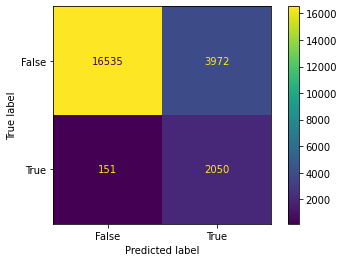

In [100]:
# XGBoost Classifier
from xgboost import XGBClassifier
XGB = XGBClassifier(eval_metric='mlogloss')
# #crossval(XGB)
classificationmodel(XGB)

In [101]:
results

,Model,TrainScore,TestScore,PrecisionTrue,RecalTrue
0,LR,0.570606,0.406024,0.114278,0.759655
1,GNB,0.609268,0.685485,0.158724,0.522035
2,DTC,1.000000,0.893253,0.447922,0.435711
3,RFC,1.000000,0.906773,0.518357,0.538846
4,KNN,0.916114,0.729170,0.145957,0.369832
5,GBC,0.879152,0.785318,0.309598,0.987733
6,XGB,0.908884,0.818434,0.340418,0.931395


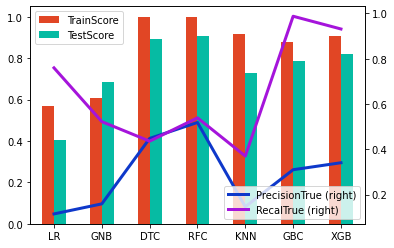

In [102]:
results[["TrainScore","TestScore"]].plot(kind="bar", color=["#E14625","#06BBA3"])
plt.xticks(range(0,len(results["Model"])), results["Model"])
results["PrecisionTrue"].plot(c="#0E38CA", linewidth=3, secondary_y=True, label="PrecisionTrue")
results["RecalTrue"].plot(c="#A514DB", linewidth=3, secondary_y=True, label="RecalTrue")
plt.legend(loc="lower right")
plt.show()

In [103]:
# Changing max_depth to avoid overfitting.
DTC2 = DecisionTreeClassifier(max_depth=32)
DTC2.fit(xTrain, yTrain)
print("Score of training dataset:",DTC2.score(xTrain, yTrain))
print("Score of testing dataset:",DTC2.score(xTest, yTest))
print(classification_report(yTest, DTC2.predict(xTest)))
results.loc[len(results.index)] = ["DTC2", DTC2.score(xTrain, yTrain), DTC2.score(xTest, yTest), precision_score(y_true=yTest, y_pred=DTC2.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=DTC2.predict(xTest), pos_label=True)]

Score of training dataset: 0.9769607364757165
Score of testing dataset: 0.8740972344548177
              precision    recall  f1-score   support

       False       0.95      0.91      0.93     20507
        True       0.39      0.54      0.45      2201

    accuracy                           0.87     22708
   macro avg       0.67      0.72      0.69     22708
weighted avg       0.89      0.87      0.88     22708



In [104]:
# Changing max_depth to avoid overfitting.
RFC2 = RandomForestClassifier(max_depth=32)
RFC2.fit(xTrain, yTrain)
print("Score of training dataset:",RFC2.score(xTrain, yTrain))
print("Score of testing dataset:",RFC2.score(xTest, yTest))
print(classification_report(yTest, RFC2.predict(xTest)))
results.loc[len(results.index)] = ["RFC2", RFC2.score(xTrain, yTrain), RFC2.score(xTest, yTest), precision_score(y_true=yTest, y_pred=RFC2.predict(xTest), pos_label=True), recall_score(y_true=yTest, y_pred=RFC2.predict(xTest), pos_label=True)]

Score of training dataset: 0.9949253440031228
Score of testing dataset: 0.895631495508191
              precision    recall  f1-score   support

       False       0.96      0.93      0.94     20507
        True       0.47      0.61      0.53      2201

    accuracy                           0.90     22708
   macro avg       0.71      0.77      0.74     22708
weighted avg       0.91      0.90      0.90     22708



Score of the training dataset: 0.943902280342214
Score of the testing dataset: 0.848115201691034 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.98      0.85      0.91     20507
        True       0.37      0.83      0.51      2201

    accuracy                           0.85     22708
   macro avg       0.68      0.84      0.71     22708
weighted avg       0.92      0.85      0.87     22708



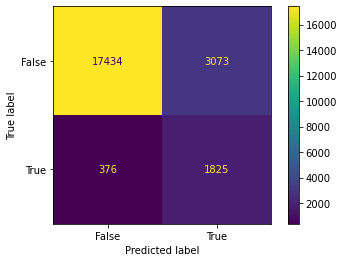

In [105]:
RFC3 = RandomForestClassifier(max_depth=32, class_weight={False:0.1,True:0.9})
classificationmodel(RFC3)

Score of the training dataset: 0.9996096418463941
Score of the testing dataset: 0.9082261757970759 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95     20507
        True       0.53      0.54      0.53      2201

    accuracy                           0.91     22708
   macro avg       0.74      0.74      0.74     22708
weighted avg       0.91      0.91      0.91     22708



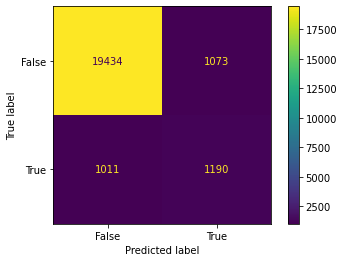

In [106]:
RFC4 = RandomForestClassifier(max_depth=32, class_weight={False:0.9,True:0.1})
classificationmodel(RFC4)

Score of the training dataset: 0.9954214241566638
Score of the testing dataset: 0.8936498150431565 

Classification report on Testing split:
              precision    recall  f1-score   support

       False       0.96      0.93      0.94     20507
        True       0.46      0.60      0.52      2201

    accuracy                           0.89     22708
   macro avg       0.71      0.76      0.73     22708
weighted avg       0.91      0.89      0.90     22708



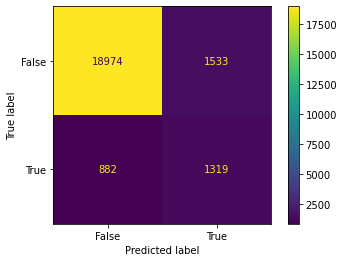

In [107]:
RFC5 = RandomForestClassifier(max_depth=32, class_weight="balanced_subsample")
classificationmodel(RFC5)

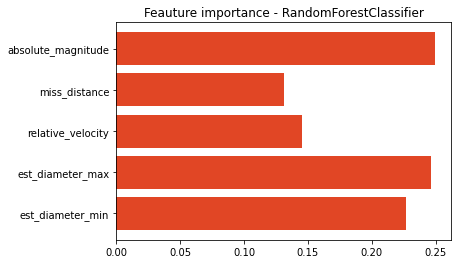

In [108]:
plt.barh(RFC5.feature_names_in_, RFC5.feature_importances_, color="#E14625")
plt.title("Feauture importance - RandomForestClassifier")
plt.show()

In [109]:
impo = pd.Series(RFC5.feature_importances_, index=xTrain.columns)
impo

est_diameter_min      0.226658
est_diameter_max      0.246537
relative_velocity     0.145744
miss_distance         0.131585
absolute_magnitude    0.249476
dtype: float64

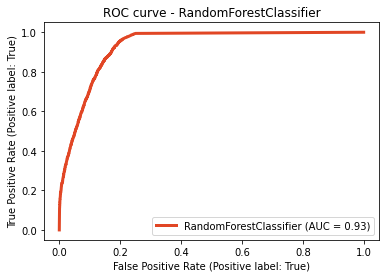

In [110]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RFC5, xTest, yTest, color="#E14625", linewidth=3) 
plt.title("ROC curve - RandomForestClassifier")
plt.show()

# Results

In [111]:
results

,Model,TrainScore,TestScore,PrecisionTrue,RecalTrue
0,LR,0.570606,0.406024,0.114278,0.759655
1,GNB,0.609268,0.685485,0.158724,0.522035
2,DTC,1.000000,0.893253,0.447922,0.435711
3,RFC,1.000000,0.906773,0.518357,0.538846
4,KNN,0.916114,0.729170,0.145957,0.369832
5,GBC,0.879152,0.785318,0.309598,0.987733
6,XGB,0.908884,0.818434,0.340418,0.931395
7,DTC2,0.976961,0.874097,0.391204,0.537483
8,RFC2,0.994925,0.895631,0.470444,0.611086


In [112]:
results[(results["TrainScore"] > 0.9) & (results["TestScore"] > 0.88) & (results["PrecisionTrue"] > 0.7) & (results["RecalTrue"] > 0.7)]

,Model,TrainScore,TestScore,PrecisionTrue,RecalTrue
